# Simulation of a reservoir problem

## Reference

* Cojazzi, Giacomo. "The DYLAM approach for the dynamic reliability analysis of systems." Reliability Engineering & System Safety 52.3 (1996): 279-296.
* Aldemir, T., Computer assisted Markov failure modelling of process control systems. IEEE Trans. on Reliab., R361 (1987) 133.

## Description

In (Cojazzi, 1996), p.286, the following reservoir problem is presented. 
* We are interested in the level in the reservoir depending on the time $L(t)$ in meters for $t\in[0,1000]$, where the time is in hours. 
* The model is based on two pumps PUMP1, PUMP2 and a valve (with index 3).
* The liquid level is initially zero: $L(0) = 0$.
* The components are statistically independent.
* All the components are in working condition at $t=0$.
* The mean failure time of the components are $\tau_1 = 219$ h (PUMP1), $\tau_2 = 175$ h (PUMP2) and $\tau_3 = 320$ h (valve).
* The flow rates of the components are 
$$
Q_1 = Q, \quad Q_2 = \frac{Q}{2}, \quad Q_3 = -Q
$$
where $Q = 0.6$ m/h. 
* If nothing happens, the level is constant and equal to zero.

In (Cojazzi, 1996), p.286, we consider the case 1, where the following controls are used.

| Region | Liquid level Z | PUMP1 | PUMP2 | VALVE |
|---|---|---|---|---|
| 1 | $L\leq -1$ | on | on | close |
| 2 | $-1 \leq L\leq 1$ | on | off | open |
| 3 | $1 \leq L$ | off | off | open |

Each component is associated to a state variable $K_1$ (pump 1), $K_2$ (pump 2) and $K_3$ (valve), which is equal to 1 if the component is active, or 0 if it fails. 

The level satisfies the following the differential equation:

$$
\frac{dL(t)}{dt} = Q_{net}(t)
$$

for $t\in[0,1000]$, where $Q_{net}$ is defined by:

$$
Q_{net}(t) = K_1(t) Q + K_2(t) \frac{Q}{2} + K_3(t) Q,
$$

where $K_i(t) = 1$ if the component is on and zero otherwise, for $i=1,2,3$.
Notice that the previous equation in the paper (eq. 12) is wrong.

The solution of the differential equation is solved based on Euler's method:

$$
L(t + \Delta t) = L(t) + Q_{net}(t) \Delta t
$$

for $t\in[0,1000]$, where $\Delta t$ is the time step.



In [1]:
import openturns as ot
from scipy.integrate import odeint
import numpy as np
import pylab as pl

In [2]:
tau_pump1 = 219.0
pump1_lifetime = ot.Exponential(1.0 / tau_pump1)

In [3]:
tau_pump2 = 175.0
pump2_lifetime = ot.Exponential(1.0 / tau_pump2)

In [4]:
tau_valve = 320.0
valve_lifetime = ot.Exponential(1.0 / tau_valve)

In [5]:
lifetime = ot.ComposedDistribution([pump1_lifetime, pump2_lifetime, valve_lifetime])

In [6]:
Q = 0.6  # Flow rate m/h

In [7]:
time_step = 1.0  # h

In [8]:
t_final = 1000.0  # h

In [9]:
def height_change_rate(L, t, Q):
    if L <= 1.0:
        K1 = 1.0  # Pump 1 is on
    else:
        K1 = 0.0

    if L <= -1.0:
        K2 = 1.0  # Pump 2 is on
    else:
        K2 = 0.0
    if L >= -1.0:
        K3 = 1.0  # Valve is on
    else:
        K3 = 0.0
    Q_net = K1 * Q + K2 * Q / 2.0 - K3 * Q
    dLdt = [Q_net]
    return dLdt

In [10]:
t0 = 0.0  # Initial time
L0 = 0.0  # Initial height

In [12]:
t = np.linspace(t0, t_final)
L = odeint(height_change_rate, L0, t, args=(Q, ))
L_final = L[-1, 0]
L_final

0.0

In [13]:
def simulate(t0, L0, t_final, number_of_time_steps, Q):
    t = np.linspace(t0, t_final, number_of_time_steps)
    L = odeint(height_change_rate, L0, t, args=(Q, ))
    return t, L

In [14]:
def simulate_and_plot(t0, L0, t_final, number_of_time_steps, Q):
    t, L = simulate(t0, L0, t_final, number_of_time_steps, Q)
    _ = pl.plot(t, L)
    pl.xlabel("t (h)")
    _ = pl.ylabel("L (m)")

In [15]:
number_of_time_steps = 1000

## Simulate with all ok

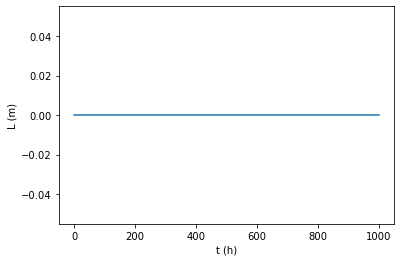

In [16]:
simulate_and_plot(t0, L0, t_final, number_of_time_steps, Q)

The level is constant.

## Simulate random failures

In [17]:
life_pump1, life_pump2, life_valve = lifetime.getRealization()

In [18]:
life_pump1, life_pump2, life_valve

(101.22868113069316, 21.81387029499254, 640.1393759292787)